In [5]:
import os
os.chdir('/Users/Olivier/anaconda3/envs/FEM')
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%autoreload 2
from FEMOL import RectangleQuadMesh, FEM_Problem, TOPOPT_Problem
from FEMOL_utils import *
import matplotlib.animation as animation
from IPython.display import display, clear_output

# Cantilever BeamTopology Optimization With Real Time Plot

### Topology optimization variables and mesh

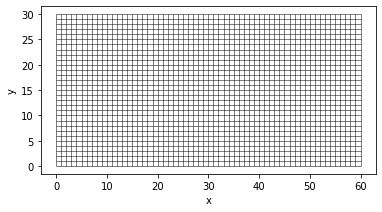

In [3]:
nelx = 60 # elements in the x direction
nely = 30 # elements in the y direction
volfrac = 0.35 # Volume fraction of material
penal = 3 # Penalization power

# Creating the mesh
Lx = nelx
Ly = nely

mesh = RectangleQuadMesh(Lx, Ly, nelx, nely)
mesh.plot()

## Defining the Cantilever Beam FEM problem

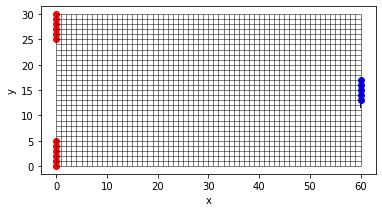

In [4]:
# distributing the material to the initial volume fraction
X = np.ones(nelx*nely)*volfrac  

# Material proprieties
material = T300_N5208()

# Composite material layup
layup = [0, 45, -45, 90, 90, -45, 45, 0]

# Creating the FEM Problem
Problem = FEM_Problem(mesh, material=material) # initialize the problem
Problem.orthotropic_plane_stress_tensor(layup) # Define the stiffness tensor
Problem.get_plane_stress_Ke() # Get the element stiffness matrix (constant for every element)

# Boundary condition domains :

# Fixed nodes on the left side
x = [0]
y1, y2 = [[0, Ly/6]], [[5*Ly/6, Ly]]

fixed_domain1 = create_domain(x, y1)
fixed_domain2 = create_domain(x, y2)
Problem.add_fixed_domain(fixed_domain1)
Problem.add_fixed_domain(fixed_domain2)

# Domain where the down force is applied
x = [Lx]
y = [[5*Ly/12, 7*Ly/12]]
force_domain = create_domain(x, y)

# Defining the force
force = [[0, -100000]] #  Force = [Fx, Fy]

Problem.add_forces(force, [force_domain])

Problem.assemble_1_material_topopt(X, penal)
Problem.fix_boundary()
Problem.plot()

## Solving the topology optimisation problem

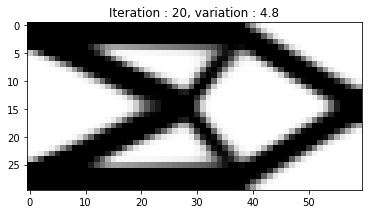

In [5]:
TO_Problem = TOPOPT_Problem(Problem)
TO_Results = TO_Problem.solve(converge=0.05)

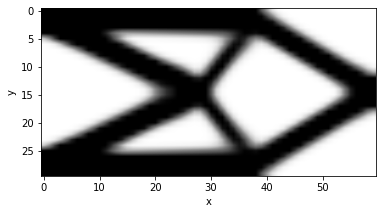

In [6]:
TO_Results.plot()

## Animating the results

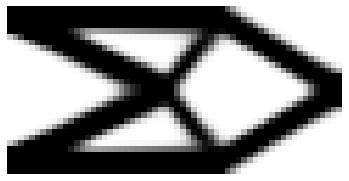

In [7]:
TO_Results.animate()